This notebook demonstrates the conversion of AEM data from aseg-gdf format to netCDF format for EM data. Note that I removed the transmitter and receiver groups as these were over-riding the root group 

Neil Symington
neil.symington@ga.gov.au

In [1]:
%matplotlib inline

from geophys_utils.netcdf_converter import aseg_gdf2netcdf_converter
from geophys_utils.netcdf_converter.aseg_gdf_utils import aseg_gdf_format2dtype
from hydrogeol_utils import AEM_utils
import netCDF4
import os, math
import numpy as np
import matplotlib.pyplot as plt
# SO we can see the logging. This enables us to debug
import gc
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")
import importlib

DEBUG:root:test
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# Define paths

root = r"C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM"
nc_out_path = os.path.join(root, "AUS_10021_OrdK_EM.nc")

dat_in_path = os.path.join(root, 'AUS_10021_OrdK_EM.dat')


dfn_in_path = os.path.join(root, 'AUS_10021_OrdK_EM.dfn')

dat_temp_path = os.path.join(root, 'AUS_10021_OrdK_EM_temp.dat')


crs_string = "EPSG:28352"

In [4]:
# This cell is a hack to deal with the four character 'data' column

with open(dat_in_path, 'r') as f:
    line = f.readline()
    if line[0:4] == 'DATA':
        s = f.read()
        new_s = s.replace('DATA', '')
        s = None
        gc.collect()


In [5]:
# Write new_s into a temporary file

with open(dat_temp_path, 'w') as f:
    f.write(new_s)
          


NameError: name 'new_s' is not defined

In [3]:
if os.path.exists(nc_out_path):
    os.remove(nc_out_path)

d2n = aseg_gdf2netcdf_converter.ASEGGDF2NetCDFConverter(nc_out_path, 
                                                 dat_temp_path, 
                                                 dfn_in_path,
                                                 crs_string,
                                                 fix_precision=True,
                                                 remove_null_columns = True)
d2n.convert2netcdf()                                      

INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Reading definitions file C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM.dfn
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:Reading data file C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM_temp.dat


[{'short_name': 'comments', 'format': 'A4', 'long_name': 'COMMENTS', 'dtype': '<U4', 'columns': 1, 'width_specifier': 4, 'decimal_places': 0, 'variable_attributes': {'aseg_gdf_format': 'A4'}}, {'short_name': 'fltline', 'format': 'F10.1', 'long_name': 'Flight line number', 'dtype': 'float64', 'columns': 1, 'width_specifier': 10, 'decimal_places': 1, 'variable_attributes': {'aseg_gdf_format': 'F10.1'}}, {'short_name': 'ga_project', 'format': 'I10', 'long_name': 'Geoscience Australia airborne survey project number', 'dtype': 'int32', 'columns': 1, 'width_specifier': 10, 'decimal_places': 0, 'variable_attributes': {'aseg_gdf_format': 'I10'}}, {'short_name': 'job_no', 'format': 'I10', 'long_name': 'SkyTEM Australia Job Number', 'dtype': 'int32', 'columns': 1, 'width_specifier': 10, 'decimal_places': 0, 'variable_attributes': {'aseg_gdf_format': 'I10'}}, {'short_name': 'fiducial', 'format': 'F15.2', 'long_name': 'Fiducial', 'dtype': 'float64', 'columns': 1, 'width_specifier': 15, 'decimal_pl

INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:10000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:20000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:30000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:40000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:50000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:60000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:70000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:80000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:90000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:100000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:110000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:120000 lines read
INFO:geophys_utils.netcdf_converter.aseg_gdf2netc

point 660370
low_moment_gate 18
high_moment_gate 23


INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing comments lookup variables
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Creating dimension for comments
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:		Writing 9 comments lookup values to array variable comments
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:		Writing comments lookup indices to array variable comments_index
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing 1D float32 variable flight_line
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing single ga_project value to scalar variable
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing single job_no value to scalar variable
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing 1D float32 variable fiducial
INFO:geophys_utils.netcdf_converter.aseg_gdf2netcdf_converter:	Writing line lookup variables
INFO:geophys_utils.netcdf_converter

In [4]:
# Create a python object with the EM dataset
d = netCDF4.Dataset(nc_out_path, "a")

In [5]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Dataset read from ASEG-GDF file AUS_10021_OrdK_EM_temp.dat
    Conventions: CF-1.6,ACDD-1.3
    featureType: trajectory
    geospatial_vertical_min: -99999.99
    geospatial_vertical_max: 1221.38
    geospatial_vertical_units: m
    geospatial_vertical_resolution: point
    geospatial_vertical_positive: up
    history: Converted from ASEG-GDF file C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM_temp.dat using definitions file C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM.dfn
    date_created: 2019-11-28T10:10:13.150816
    geospatial_east_resolution: point
    geospatial_north_resolution: point
    geospatial_lon_min: 128.1942138671875
    geospatial_lon_max: 129.60977172851562
    geospatial_lon_units: degrees East
    geospatial_lat_min: -15.878686904907227
    geospatial_lat_max: -14.827213287353516
    geospatial_lat_

In [6]:
d.close()

In [6]:
# Now we want to parse the stm files

# Create an AEM system instance
skytem = AEM_utils.AEM_System("SkyTEM312Fast", dual_moment = True)

# Open the lm and hm files
root = r"C:\Users\PCUser\Desktop\EK_data\AEM\stm_file"

lm_file = os.path.join(root, "Skytem312Fast-LM_pV.stm")

hm_file = os.path.join(root, "Skytem312Fast-HM_pV.stm")

# Parse
skytem.parse_stm_file(lm_file, 'LM')

skytem.parse_stm_file(hm_file, 'HM')

In [7]:
print(skytem.LM)

{'Transmitter': {'NumberOfTurns': 1, 'PeakCurrent': 1, 'LoopArea': 1, 'BaseFrequency': 275, 'WaveformDigitisingFrequency': 4505600, 'WaveFormCurrent': array([[-8.0000e-04,  0.0000e+00],
       [-7.1847e-04,  1.2266e-01],
       [-6.5990e-04,  1.9609e-01],
       [-3.8062e-04,  5.2228e-01],
       [-1.6838e-04,  7.7866e-01],
       [-5.1442e-05,  9.3110e-01],
       [ 0.0000e+00,  1.0000e+00],
       [ 1.2800e-07,  9.9627e-01],
       [ 6.2400e-07,  9.7994e-01],
       [ 1.1840e-06,  9.3093e-01],
       [ 2.9600e-06,  6.7610e-01],
       [ 5.1200e-06,  3.5920e-01],
       [ 6.2400e-06,  2.2688e-01],
       [ 7.5200e-06,  1.2234e-01],
       [ 8.8000e-06,  5.6996e-02],
       [ 1.0048e-05,  2.2692e-02],
       [ 1.2000e-05,  4.7230e-03],
       [ 1.2800e-05,  0.0000e+00],
       [ 1.0182e-03,  0.0000e+00]])}, 'Receiver': {'NumberOfWindows': 18, 'WindowWeightingScheme': 'AreaUnderCurve', 'WindowTimes': array([[1.4630e-05, 1.8200e-05],
       [1.8630e-05, 2.3200e-05],
       [2.3630e-05, 2

In [8]:
print(skytem.HM)

{'Transmitter': {'NumberOfTurns': 1, 'PeakCurrent': 1, 'LoopArea': 1, 'BaseFrequency': 25, 'WaveformDigitisingFrequency': 819200, 'WaveFormCurrent': array([[-5.00000e-03,  0.00000e+00],
       [-4.79532e-03,  6.52344e-01],
       [-4.69386e-03,  9.33594e-01],
       [-3.82897e-03,  9.49219e-01],
       [-2.13784e-03,  9.77344e-01],
       [-7.26966e-04,  9.94531e-01],
       [-2.19939e-06,  1.00000e+00],
       [ 1.04316e-05,  9.81961e-01],
       [ 5.79841e-05,  8.39282e-01],
       [ 1.48063e-04,  5.57539e-01],
       [ 2.31183e-04,  2.88357e-01],
       [ 2.79509e-04,  1.29935e-01],
       [ 3.15850e-04,  1.35143e-02],
       [ 3.28993e-04,  0.00000e+00],
       [ 1.50000e-02,  0.00000e+00]])}, 'Receiver': {'NumberOfWindows': 23, 'WindowWeightingScheme': 'AreaUnderCurve', 'WindowTimes': array([[0.00042663, 0.0004462 ],
       [0.00044663, 0.0004712 ],
       [0.00047163, 0.0005022 ],
       [0.00050263, 0.0005422 ],
       [0.00054263, 0.0005932 ],
       [0.00059363, 0.0006562 ],
 

In [9]:

lm_a = skytem.LM['Transmitter']['WaveFormCurrent']
hm_a = skytem.HM['Transmitter']['WaveFormCurrent']

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) n

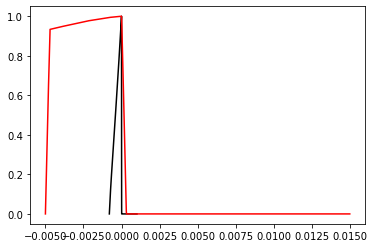

In [10]:


plt.plot(lm_a[:,0], lm_a[:,1], 'k')
plt.plot(hm_a[:,0], hm_a[:,1], 'r')
plt.show()

In [11]:
# Now we want to add this metadata to the netcdf file

#tx_grp = d.createGroup('Transmitter')


# Dimensions for the current times
lm_current_times = d.createDimension("low_moment_current_time", 
                                    skytem.LM['Transmitter']['WaveFormCurrent'].shape[0])

hm_current_times = d.createDimension("high_moment_current_time", 
                                    skytem.HM['Transmitter']['WaveFormCurrent'].shape[0])



In [12]:
# Create dimension variables

lm_current_times = d.createVariable("low_moment_current_time","f8",("low_moment_current_time",))
hm_current_times = d.createVariable("high_moment_current_time","f8",("high_moment_current_time",))


In [13]:
# Create other variables

lm_waverform_current = d.createVariable("low_moment_waverform_current","f8",("low_moment_current_time",))

hm_waverform_current = d.createVariable("high_moment_waverform_current","f8",("high_moment_current_time",))

In [14]:
# Add data to the variables

lm_current = skytem.LM['Transmitter']['WaveFormCurrent']
hm_current = skytem.HM['Transmitter']['WaveFormCurrent']

lm_current_times[:] = lm_current[:,0]
hm_current_times[:] = hm_current[:,0]

lm_waverform_current[:] = lm_current[:,1]
hm_waverform_current[:] = hm_current[:,1]

In [15]:
# Add an scalar vats for frame geometries assuming a horizontal frame
# These are from the SkyTEM files



tx_area = d.createVariable('tx_loop_area',"f8",())
tx_area[:] = 337.
tx_area.units = 'm**2'
tx_area.long_name = "Transmitter (Tx) Loop Area"


In [18]:
#rx_grp = d.createGroup('Receiver')

In [16]:
gate_openclose = d.createDimension("gate_open_close", 
                                   2)
gates = d.createVariable("gate_open_close","i1",("gate_open_close",))


In [17]:


lm_window_times =  d.createVariable("low_moment_window_time","f8",("low_moment_gate",
                                                                  "gate_open_close"))

hm_window_times =  d.createVariable("high_moment_window_time","f8",("high_moment_gate",
                                                                   "gate_open_close"))


In [18]:
# Add data

lm_gates = skytem.LM['Receiver']['WindowTimes']
hm_gates = skytem.HM['Receiver']['WindowTimes']

lm_window_times[:] = lm_gates
hm_window_times[:] = hm_gates

In [19]:
d['line_index'][:]

masked_array(data=[  0,   0,   0, ..., 583, 583, 583],
             mask=False,
       fill_value=999999)

In [20]:


rx_x_pos = d.createVariable("Rx_z_component_position_x","f8",())
rx_x_pos[:] = -13.37
rx_x_pos.units = 'm'
rx_x_pos.long_name = 'Z-component EM sensor relative position from centre of horizontal frame, in flight direction'
rx_x_pos.sign_convention = 'Front of frame is positive'

rx_y_pos = d.createVariable("Rx_z_component_position_y","f8",())
rx_y_pos[:] = 0.
rx_y_pos.units = 'm'
rx_y_pos.long_name = 'Z-component EM sensor relative position from centre of horizontal frame, perpendicular to flight direction'
rx_y_pos.sign_convention = 'Starboard of frame is positive'

rx_z_pos = d.createVariable("Rx_z_component_position_z","f8",())
rx_z_pos[:] = -2.
rx_z_pos.units = 'm'
rx_z_pos.long_name = 'Z-component EM sensor relative position from centre of horizontal frame, in vertical direction'
rx_z_pos.sign_convention = 'Down is positive'

In [21]:
rx_x_x_pos = d.createVariable("Rx_x_component_position_x","f8",())
rx_x_x_pos[:] = -14.75
rx_x_x_pos.units = 'm'
rx_x_x_pos.long_name = 'X-component EM sensor relative position from centre of horizontal frame, in flight direction'
rx_x_x_pos.sign_convention = 'Front of frame is positive'

rx_x_y_pos = d.createVariable("Rx_x_component_position_y","f8",())
rx_x_y_pos[:] = 0.
rx_x_y_pos.units = 'm'
rx_x_y_pos.long_name = 'X-component EM sensor relative position from centre of horizontal frame, perpendicular to flight direction'
rx_x_y_pos.sign_convention = 'Starboard of frame is positive'

rx_x_z_pos = d.createVariable("Rx_x_component_position_z","f8",())
rx_x_z_pos[:] = -0.04
rx_x_z_pos.units = 'm'
rx_x_z_pos.long_name = 'X-component EM sensor relative position from centre of horizontal frame, in vertical direction'
rx_x_z_pos.sign_convention = 'Down is positive'

In [22]:
lm_waverform_current.units = 'normalised_current_amplitude'
hm_waverform_current.units = 'normalised_current_amplitude'

lm_current_times.units = 'seconds'
hm_current_times.units = 'seconds'

lm_window_times.units = 'seconds_since_waveform_rampdown'
hm_window_times.units = 'seconds_since_waveform_rampdown'

In [23]:
# Now we want to calculate the roll pitch and yaw

#Input angle X and Y in the SkyTEM sign convention 
#Nose up      = +ve x-tilt
#Left wing up = +ve y-tilt

#output roll and pitch are in the GA modelling sign convention
#Left wing up = +ve roll    
#Nose down is = +ve pitch
#turn left is = +ve yaw

# As frame roll is simply y-tilt we just rename the variable
try:
    d.renameVariable('y_tilt', 'roll')
except KeyError:
    print('Variable not found')

# We need to recalcualte for the GA convention
d2r = math.pi/180
r2d = 180/math.pi
try:
    # From Ross' tilt2rollpitchyaw function
    frame_pitch = -r2d * np.arcsin(np.sin(d2r*d.variables['x_tilt'][:])/
                                   np.cos(d2r*d.variables['roll'][:]))
    d.variables['x_tilt'][:] = frame_pitch
    d.renameVariable('x_tilt', 'pitch')
except KeyError:
    print('Variable not found')

# Yaw is zero so we can just create a scalar variable
yaw =  d.createVariable("yaw","f8",())
yaw[:] = 0


In [24]:
# Add an attribute describing the sign convention
pitch = d['pitch']
pitch.sign_convention = 'Nose down is positive pitch'

roll = d['roll']
pitch.sign_convention = 'Left wing up is positive roll'

d['yaw'].long_name = 'Rotation of frame vertical axis'


In [25]:
def rollpitchyaw_array(roll, pitch, yaw):
    """
    FRom Ross' rollpitchyaw_matrix.m
    """

    d2r = math.pi/180
    # Calculate the cosine and sine of role, pitch and yaw
    cosr = np.cos(d2r*roll);
    cosp = np.cos(d2r*pitch);
    cosy = np.cos(d2r*yaw);

    sinr = np.sin(d2r*roll);
    sinp = np.sin(d2r*pitch);
    siny = np.sin(d2r*yaw)
    # Create the array
    a = np.zeros(shape = (roll.shape[0],3,3), dtype = np.float32)
    a[:,0,0] = cosp*cosy
    a[:,0,1] = cosp*siny
    a[:,0,2] = -sinp
    a[:,1,0] = sinr*sinp*cosy - cosr*siny
    a[:,1,1] = sinr*sinp*siny + cosr*cosy
    a[:,1,2] = sinr*cosp
    a[:,2,0] = cosr*sinp*cosy + sinr*siny
    a[:,2,1] = cosr*sinp*siny - sinr*cosy
    a[:,2,2] = cosr*cosp
    
    return a


In [26]:
# Get the offsets for the receiver

yaw_arr = yaw[:]*np.ones(shape=roll[:].shape,
              dtype = roll[:].dtype)

R = rollpitchyaw_array(roll[:], pitch[:],
                       yaw_arr)
# Get the offsets of the receiver when the frame is horizontal
txrx_dx = d['Rx_z_component_position_x'][:]
txrx_dy = d['Rx_z_component_position_y'][:] 
txrx_dz = d['Rx_z_component_position_z'][:]

v0 = np.array([txrx_dx, txrx_dy, txrx_dz])

# Get matrix products of two arrays

V = np.matmul(v0, R)


In [27]:
# Create variables

txrx_dx = d.createVariable("TxRx_dx","f8",('point'))
txrx_dx[:] = V[:,0]
txrx_dx.units = 'm'
txrx_dx.aseg_gdf_format = 'E7.2'
txrx_dx.long_name = 'Z-component EM sensor relative position from centre of frame, in flight direction'
txrx_dx.sign_convention = 'Front of frame is positive'

txrx_dy = d.createVariable("TxRx_dy","f8",('point'))
txrx_dy[:] = V[:,1]
txrx_dy.units = 'm'
txrx_dy.aseg_gdf_format = 'E7.2'
txrx_dy.long_name = 'X-component EM sensor relative position from centre of frame, perpendicular to flight direction'
txrx_dy.sign_convention = 'Starboard of frame is positive'

txrx_dz = d.createVariable("TxRx_dz","f8",('point'))
txrx_dz[:] = V[:,2]
txrx_dz.units = 'm'
txrx_dz.aseg_gdf_format = 'E7.2'
txrx_dz.long_name = 'X-component EM sensor relative position from centre of frame, in vertical direction'
txrx_dz.sign_convention = 'Down is positive'

In [29]:
d.close()

In [30]:
d = netCDF4.Dataset(nc_out_path, 'r')

In [31]:
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Dataset read from ASEG-GDF file AUS_10021_OrdK_EM_temp.dat
    Conventions: CF-1.6,ACDD-1.3
    featureType: trajectory
    geospatial_vertical_min: -99999.99
    geospatial_vertical_max: 1221.38
    geospatial_vertical_units: m
    geospatial_vertical_resolution: point
    geospatial_vertical_positive: up
    history: Converted from ASEG-GDF file C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM_temp.dat using definitions file C:\Users\PCUser\Desktop\EK_data\AEM\OrdKeep_SkyTEM_190117\01_EM\AUS_10021_OrdK_EM.dfn
    date_created: 2019-11-28T10:10:13.150816
    geospatial_east_resolution: point
    geospatial_north_resolution: point
    geospatial_lon_min: 128.1942138671875
    geospatial_lon_max: 129.60977172851562
    geospatial_lon_units: degrees East
    geospatial_lat_min: -15.878686904907227
    geospatial_lat_max: -14.827213287353516
    geospatial_lat_